# Integrali

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Primer

In [2]:
def func(x):
    return 0.5 + 0.1 * x + 0.2 * x**2 + 0.03 * x**3

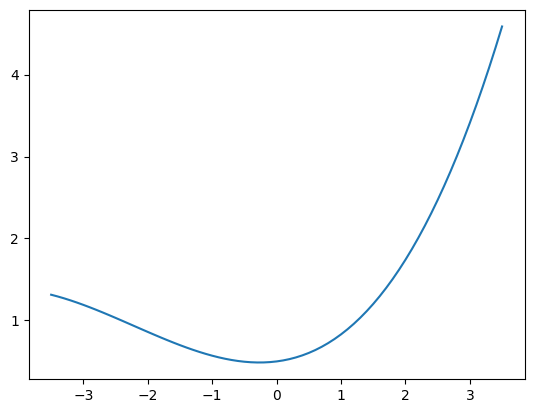

In [3]:
x_list = np.linspace(-3.5, 3.5, 71)
plt.plot(x_list, func(x_list))

Analitična rešitev

$$ f(x) = \frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3 $$

$$ A = \int_{-3}^3 f(x)\,\mathrm{d}x = \int_{-3}^3\left(\frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3\right)\,\mathrm{d}x = \left[\frac{1}{2}x + \frac{1}{20}x^2 + \frac{1}{15}x^3 + \frac{3}{400}x^4\right]_{-3}^3$$

In [4]:
( 1/2*(3) + 1/20*(3)**2 + 1/15*(3)**3 + 3/400*(3)**4 ) - ( 1/2*(-3) + 1/20*(-3)**2 + 1/15*(-3)**3 + 3/400*(-3)**4 )

6.6

## Numerična integracija

$$ A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{n-1}\sum_{i=1}^n f(x_i) $$

Robovi so problematični, ker so preveč reprezentatirani. Metoda deluje zgolj, če so podatki ekvivalentne oddaljenosti.

Ustvarimo podatke za numerično integracijo:

In [5]:
x_points = np.linspace(-3,3,13)
data = np.array([x_points, func(x_points)])

In [6]:
data

array([[-3.     , -2.5    , -2.     , -1.5    , -1.     , -0.5    ,
         0.     ,  0.5    ,  1.     ,  1.5    ,  2.     ,  2.5    ,
         3.     ],
       [ 1.19   ,  1.03125,  0.86   ,  0.69875,  0.57   ,  0.49625,
         0.5    ,  0.60375,  0.83   ,  1.20125,  1.74   ,  2.46875,
         3.41   ]])

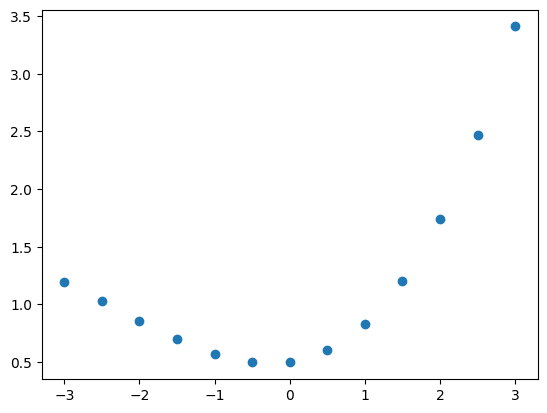

In [7]:
plt.scatter(data[0], data[1])

In [8]:
def integralSum(data):
    return np.sum(data[1]) * (data[0,-1] - data[0,0]) / ( len(data[1]) - 1 )

In [9]:
integralSum(data)

7.800000000000001

## Trapezoidni model

Linearno povezave med točki tvojiro trapeze. S trapezoidnim modelom je mogoče integrirati tudi podatke, ki niso enakomerno oddaljeni.

$$ A = \int_{a}^b f(x)\,\mathrm{d}x \approx \sum_{i=1}^{n-1} \frac{f(x_{i+1})+f(x_{i})}{2}(x_{i+1}-x_i) $$

In [10]:
def integralTrapezoidal(data):
    a = 0
    for i in range( len(data[0]) - 1 ):
        a = a + ( data[1,i+1] + data[1,i] ) / 2 * ( data[0,i+1] - data[0, i] )
    return a

In [11]:
integralTrapezoidal(data)

6.650000000000001

## Simpsonovo pravilo in Newton-Cortesova enačba

Metoda predstavlja integracijo polinomske interpolacijske funkcije skozi podatkovne točke. Koeficienti so optimizirani.

### Simpsonovno pravilo

$$ A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{n-1} \left[ \frac{1}{3}f(x_1) + \frac{4}{3}f(x_2) + \frac{2}{3}f(x_3) + \frac{4}{3}f(x_4) + \dots + \frac{4}{3}f(x_{n-3}) + \frac{2}{3}f(x_{n-2}) + \frac{4}{3}f(x_{n-1}) + \frac{1}{3}f(x_n) \right] $$

Pozor, metoda deluje zgolj, če je število točk liho.

In [12]:
def integralSimpson(data):
    return ( 1/3*data[1,0] + 4/3*np.sum(data[1,1:-1:2]) + 2/3*np.sum(data[1,2:-1:2]) + 1/3*data[1,-1] ) \
        * (data[0,-1] - data[0,0]) / ( len(data[1]) - 1 )

In [13]:
integralSimpson(data)

6.599999999999999

## Fourierjeva transformacija

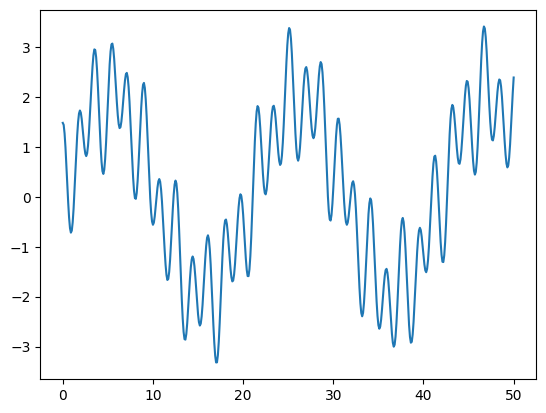

In [14]:
tList = np.linspace(0,50,501)

freq1 = 2.0
freq2 = 0.3
freq3 = 3.5

yList = 0.5*np.cos(tList*freq1+0.3) + 2.0*np.sin(tList*freq2) + 1.0*np.cos(tList*freq3)

data = np.array([tList,yList])

plt.plot(data[0],data[1])

In [15]:
integralTrapezoidal(data)

11.373146764083113

### Fourierjeva transformacija

$$
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
$$

In [16]:
omega = 0.3

integrand = np.array([tList, 1/np.sqrt(2*np.pi) * yList * np.exp(1j*omega*tList)])

print(abs(integralTrapezoidal(integrand))**2)

420.16655955096377


In [17]:
ft = np.array(
    [[om,
    integralTrapezoidal( np.array([tList, 1/np.sqrt(2*np.pi) * yList * np.exp(1j*om*tList)]) )] for om in np.linspace(0,10,1001)
    ]
)

In [18]:
ft[:,0]

array([ 0.  +0.j,  0.01+0.j,  0.02+0.j, ...,  9.98+0.j,  9.99+0.j,
       10.  +0.j])

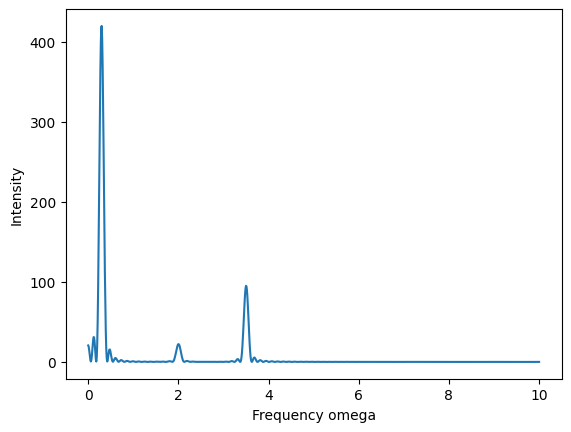

In [19]:
plt.xlabel('Frequency omega')
plt.ylabel('Intensity')

plt.plot(ft[:,0].real, abs(ft[:,1])**2 )

In [20]:
ft[25:35,0]

array([0.25+0.j, 0.26+0.j, 0.27+0.j, 0.28+0.j, 0.29+0.j, 0.3 +0.j,
       0.31+0.j, 0.32+0.j, 0.33+0.j, 0.34+0.j])

In [21]:
abs(ft[25:35,1])**2

array([257.64250453, 314.4191087 , 363.06038133, 398.91013973,
       418.53765769, 420.16655955, 403.87504871, 371.54322565,
       326.56272101, 273.35955584])

## Numpy: Fast Fourier Transform (FFT)

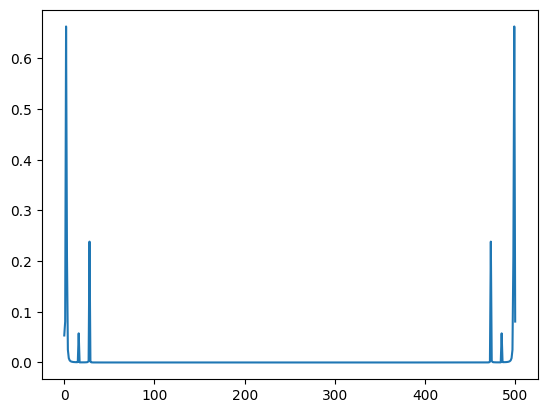

In [22]:
ft = np.fft.fft(yList)/len(yList)

plt.plot(abs(ft)**2 ) 

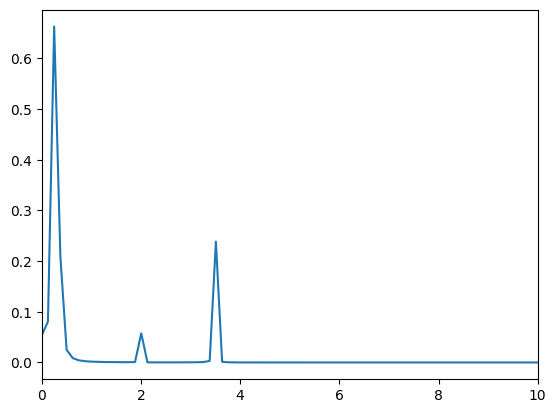

In [23]:
frequencies = np.arange(len(yList)) / ( len(yList)*0.1 )

plt.xlim([0, 10])
plt.plot( frequencies*2*np.pi, abs(ft)**2 ) 